In [1]:
!pip install qiskit && pip install qiskit-aer && pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0293db48526b1fbc1a3cb2901774310c64e06521984e3efe24f1abce6d2cd8f1
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

In [3]:
import numpy as np
from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister
from qiskit import IBMQ , Aer , execute
from qiskit . visualization import plot_histogram, plot_bloch_multivector , array_to_latex
from qiskit . extensions import Initialize
from qiskit . quantum_info import random_statevector , Statevector
from qiskit . result import marginal_counts
from qiskit import quantum_info

In [10]:
def crear_estado_alice(psi):
  q0_init_gate = Initialize(psi)
  q0_reverse_gate = q0_init_gate.gates_to_uncompute()
  return q0_init_gate, q0_reverse_gate

In [11]:
def crear_estado_de_bell (circuito , q0 , q1 , bell):
  circuito .h(q0)
  circuito .cx(q0 , q1)
  match bell:
    case "10":
      circuito .x(q1)
    case "01":
      circuito .z(q1)
    case "11":
      circuito .x(q1)
      circuito .z(q0)
    case "00":
      print ("Nada que hacer ")

In [12]:
def alice_operaciones(circuito, q0, q1):
    circuito.cx(q0, q1)
    circuito.h(q0)

def medir_luego_enviar(circuito, q0, q1, bit0, bit1):
    circuito.measure(q0, bit0)
    circuito.measure(q1, bit1)

In [13]:
def bob_operaciones(circuito, q2, bit0, bit1, bell):
    circuito.x(q2).c_if(bit1, not int(bell[0]))
    circuito.z(q2).c_if(bit0, not int(bell[1]))

In [14]:
def teleportation(psi, bell_state="00"):
    # Se define el estado inicial y su inverso
    q0_init, q0_reverse = crear_estado_alice(psi)

    # Se definen 3 qúbits
    qubits = QuantumRegister(3, name="q")

    # Se definen 2 canales clásicos
    bit0 = ClassicalRegister(1, name="bit0")
    bit1 = ClassicalRegister(1, name="bit1")

    # Se construye el objeto circuito
    circuito = QuantumCircuit(qubits, bit0, bit1)

    # Se inicializa el qúbit de Alice:
    circuito.append(q0_init, [0])
    circuito.barrier()

    #Se crea un par de qubits en un estado tipo Bell
    crear_estado_de_bell(circuito, qubits[1], qubits[2], bell_state)
    circuito.barrier()

    #Alice realiza operaciones con sus qubits
    alice_operaciones(circuito, qubits[0], qubits[1])

    #Alice mide sus qúbits y envía los resultados a Bob
    medir_luego_enviar(circuito, qubits[0], qubits[1], bit0, bit1)
    circuito.barrier()

    #Bob recibe bits de Alice y efectúa algunas operaciones
    bob_operaciones(circuito, qubits[2], bit0, bit1, bell_state)

    return [circuito, qubits]

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


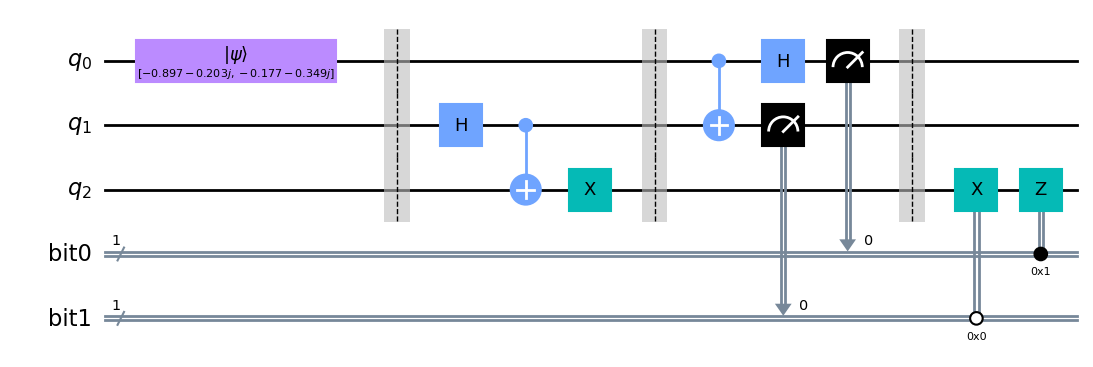

In [15]:
#Definimos la información del vector de estado que se desea teletransportar
psi = Statevector(random_statevector(2))

#Ejecutamos el algoritmo de teleportación en el estado Bell 10
qc, qubits = teleportation(psi, bell_state="10")

#Dibujamos el circuito resultante
qc.draw(output="mpl")

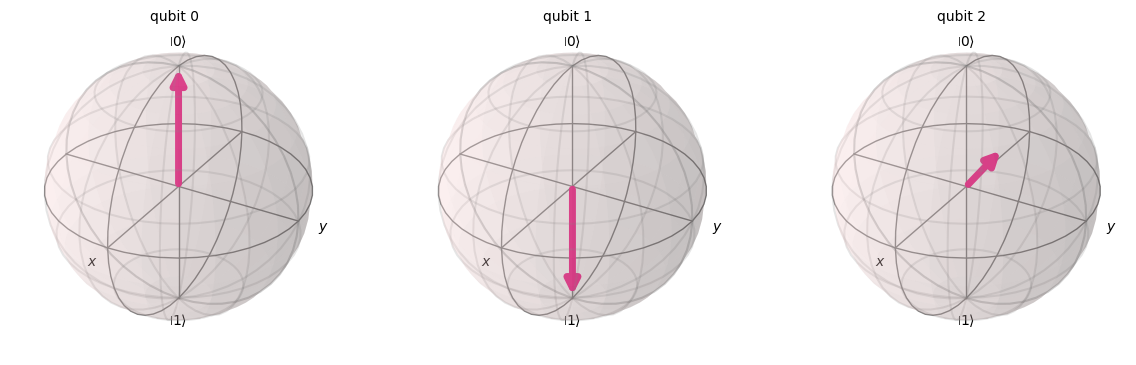

In [16]:
#Configuramos el simulador para correr el circuito
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()

#Ejecutamos el circuito en el simulador y accedemos a los vectores de estado resultantes
out = execute(qc, sim).result().get_statevector()

#Dibujamos los vectores de estado de cada qúbit
plot_bloch_multivector(out)